In [78]:
# Imports libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [79]:
# Loading data

usa_df = pd.read_csv("UsArrests.csv")

usa_df = usa_df.rename(columns = {'City':'State'}) # A column containing the 50 states was named 'City', this corrects that.

usa_df = usa_df.set_index('State') # Sets the state column as the index

usa_df.head()

,Murder,Assault,UrbanPop,Rape
State,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [80]:
# Viewing a summary of the dataset's statistical properties

described = usa_df.describe()
stats = described.loc[["mean","std","min","max"]].transpose() # Selects only the mean, standard deviation, min, and max stats
stats

,mean,std,min,max
Murder,7.788,4.355510,0.8,17.4
Assault,170.760,83.337661,45.0,337.0
UrbanPop,65.540,14.474763,32.0,91.0
Rape,21.232,9.366385,7.3,46.0


Assault mean is high as there are many more assault arrests per 100,000 people than murder or rape arrests. UrbanPop is high compared to murder and rape as UrbanPop is in percent.

 **Missing Data**

In [81]:
usa_df.isnull().sum() # Counts null values per column

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

There is no missing data.

**Data Types**

In [82]:
# Checking data types of the columns

usa_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


**Observing the Spread of the Data Using Histograms**

array([[<AxesSubplot: title={'center': 'Murder'}>,
        <AxesSubplot: title={'center': 'Assault'}>],
       [<AxesSubplot: title={'center': 'UrbanPop'}>,
        <AxesSubplot: title={'center': 'Rape'}>]], dtype=object)

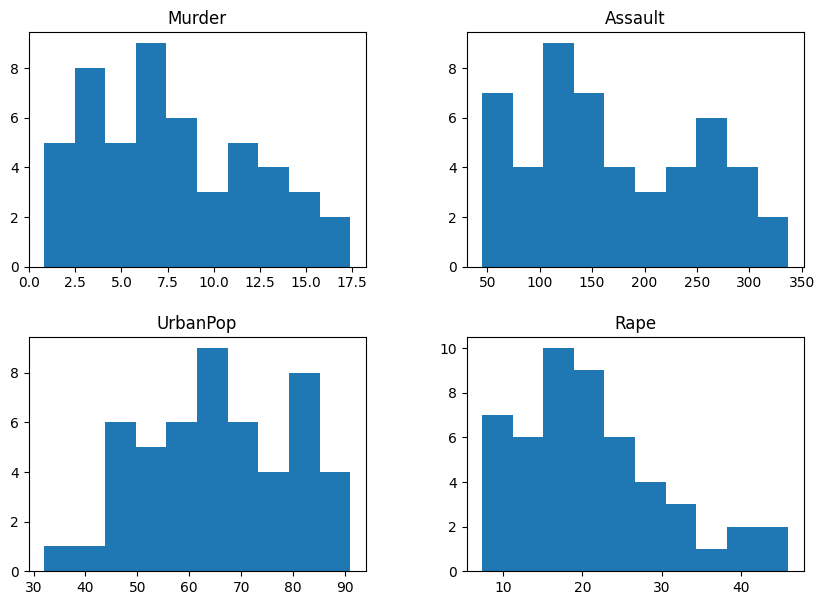

In [83]:
usa_df.hist(grid=False, figsize=(10, 7)) # Creating histograms

### Correlation Analysis

<AxesSubplot: >

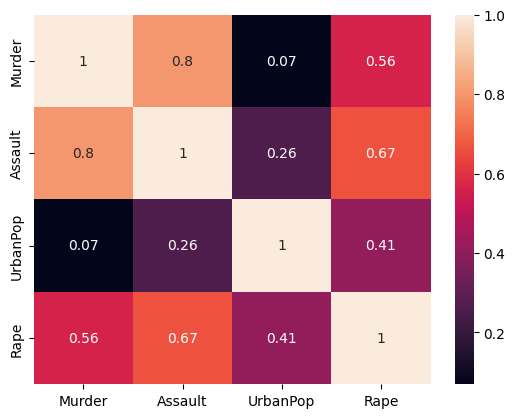

In [84]:
import seaborn as sns

states = usa_df.index # For use later in making biplots
labels = usa_df.columns # For use later in making biplots

usa_corr = usa_df.corr() # Computes correlations between columns

sns.heatmap(usa_corr, annot = True) # Plots heatmap based on correlations

**Murder** and **Assault** have a **strong** correlation. 

This may be because those who commit a serious violent offence are likely to have also committed less serious violent offences, but also because a person arrested for murder could have been charged with the assault and murder of one victim.

**Murder** and **UrbanPop** have **almost no** correlation.

**Murder** and **Rape** have a **medium** correlation.

Similarly to murder and assault, this may be because one person could be charged with the murder *and* rape of one victim. As these are both serious violent crimes, it may be expected that a person willing to commit one would be willing to commit the other. However they are not as strongly correlated as murder and assault, perhaps because unlike murder and assault, rape is a form of sexual violence. This means that motives for assault and murder could be very similar, but motives for rape and murder could be different, thus the presence of one does not as strongly suggest the presence of the other.

**Assault** and **UrbanPop** have a **small amount** of correlation.

This may be because a higher percentage of the population living in urban areas means more people living closely together, and thus more opportunities for a confrontation to occur. However as the correlation is not strong, UrbanPop is not a major factor in the frequency of assault.

**Assault** and **Rape** have a **medium high** correlation

This may be because one person is being charged with the assault *and* rape of one victim. As the majority of rapes are not commited by strangers, but by someone with victims knows, this could also indicate the presence of ongoing domestic violence issues in some cases.

**Rape** and **UrbanPop** have a **medium** correlation

As stated previously, the majority of rapes are commited by someone the victim knows. In urban environments people may have access to a bigger network of aquaintances that haven't been fully vetted by others in the community. Rapists may also have easier access to date rape drugs, and more opportunities to administer them. Around a 10th of rapes are committed by strangers, so in those cases opportunity is likely key.

### Principal Components Analysis

In [85]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
  
usa_df = scaler.fit_transform(usa_df) # Scaling the data

pca = PCA()

X_trans = pca.fit_transform(usa_df)

usa_pca = pd.DataFrame(X_trans,index=states)
usa_pca.head()

,0,1,2,3
State,,,,
Alabama,0.985566,1.133392,-0.444269,0.156267
Alaska,1.950138,1.073213,2.040003,-0.438583
Arizona,1.763164,-0.745957,0.054781,-0.834653
Arkansas,-0.141420,1.119797,0.114574,-0.182811
California,2.523980,-1.542934,0.598557,-0.341996


In [86]:
# Checking standard deviation

std = usa_pca.describe().transpose()["std"]
print(f"Standard deviation: {std.values}")

Standard deviation: [1.5908673  1.00496987 0.6031915  0.4206774 ]


In [87]:
print(f"Proportion of Variance Explained: {pca.explained_variance_ratio_}")

Proportion of Variance Explained: [0.62006039 0.24744129 0.0891408  0.04335752]


In [88]:
print(f"Cumulative Proportion: {np.cumsum(pca.explained_variance_)}")

Cumulative Proportion: [2.53085875 3.5408232  3.90466318 4.08163265]


**Biplot**

In [105]:

def biplot(score, coeff, labels = None, points = None): # Creates a biplot

    xs = score[:, 0]
    ys = score[:, 1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())

    fig, ax = plt.subplots()    

    ax.scatter(xs * scalex, ys * scaley, s = 5)

    for i in range(0,len(xs)):
        txt = states[i] # Uses the variable created earlier
        ax.annotate(txt, (xs[i]* scalex, ys[i]* scaley))

    for i in range(n):
        ax.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'r', alpha = 0.5)
        if labels is None:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            ax.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.grid()



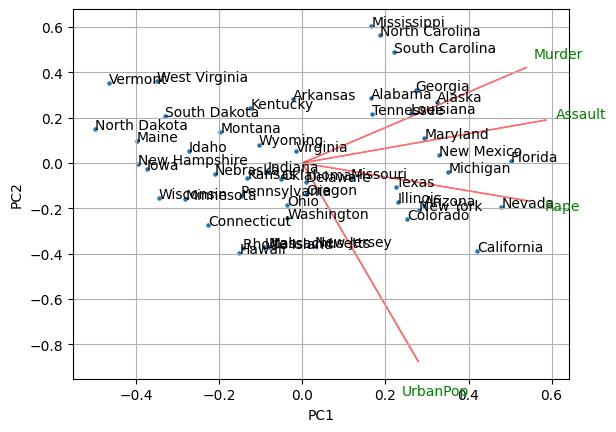

In [90]:
biplot(X_trans[:,0:2],np.transpose(pca.components_[0:2, :]),list(labels),list(states))
plt.show()

Some small clusters can be seen with states that have higher murder, assault, or rape. These are states with high values for PC1. States which have less than 0.1 for PC1 seem to be in one large cluster together.

**Feature Importance**

In [91]:
pc1 = abs(pca.components_[0] ) 
pc2 = abs(pca.components_[1] )

feature_importance_df = pd.DataFrame()
feature_importance_df["Features"] = list(labels)
feature_importance_df["PC1 Importance"] = pc1
feature_importance_df["PC2 Importance"] = pc2
feature_importance_df

,Features,PC1 Importance,PC2 Importance
0,Murder,0.535899,0.418181
1,Assault,0.583184,0.187986
2,UrbanPop,0.278191,0.872806
3,Rape,0.543432,0.167319


In both PC1 and PC2 Urban pop is the outlier, contributing least by quite a portion in PC1 and most by quite a portion in PC2.

### Cumulative Explained Variance and Scree

Text(0.5, 1.0, 'Cumulative Explained Variance')

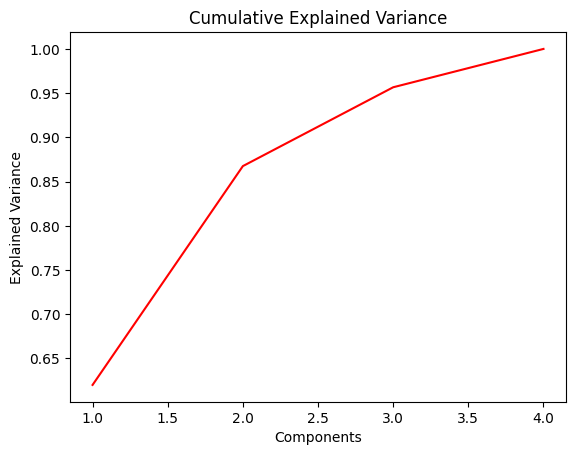

In [92]:
plt.ylabel('Explained Variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c = 'red')
plt.title("Cumulative Explained Variance")

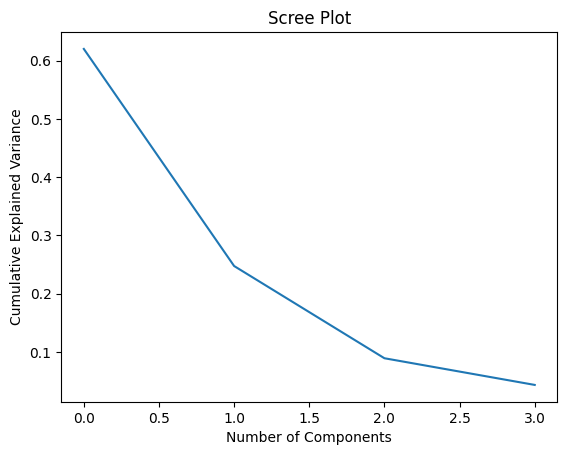

In [93]:
# Scree plot

plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title("Scree Plot")
plt.show()

We can see from this graph that most of the variance is explained by the first 2 components.

In [94]:
usa_pca = usa_pca.iloc[:,[0,1]]

usa_pca.head()

,0,1
State,,
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


### Hierarchical Clustering

In [95]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(distance_threshold = 0, n_clusters = None)
model = model.fit(usa_pca)

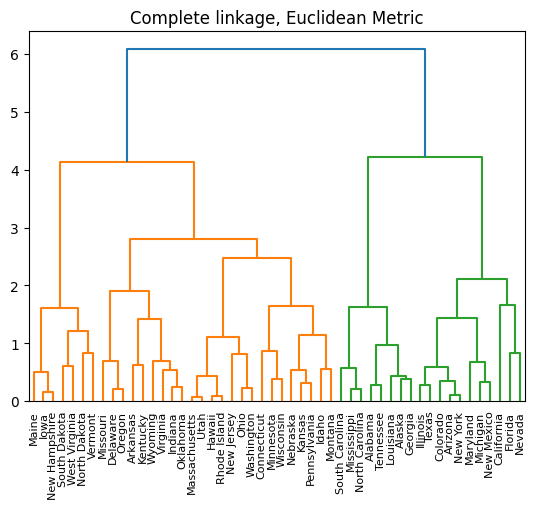

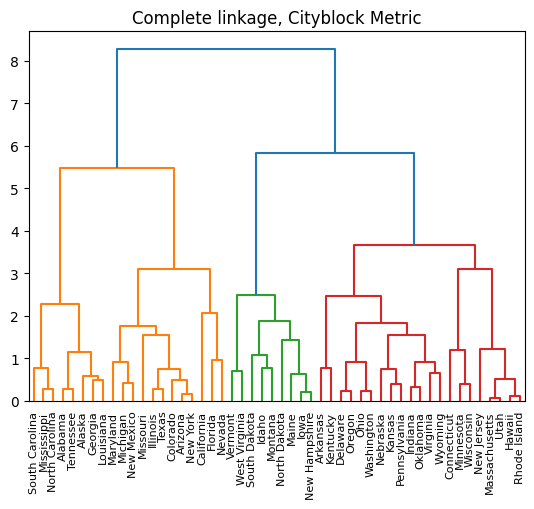

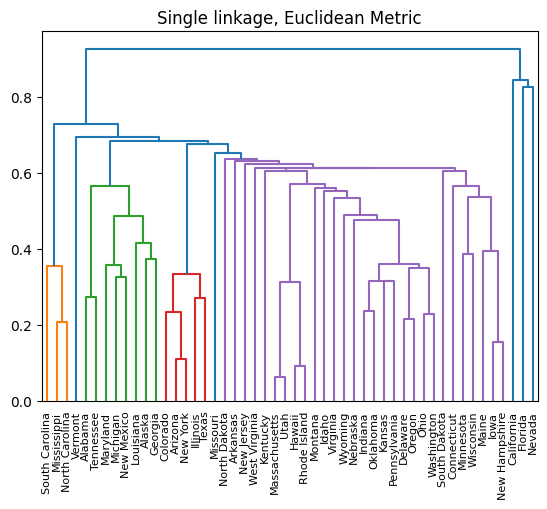

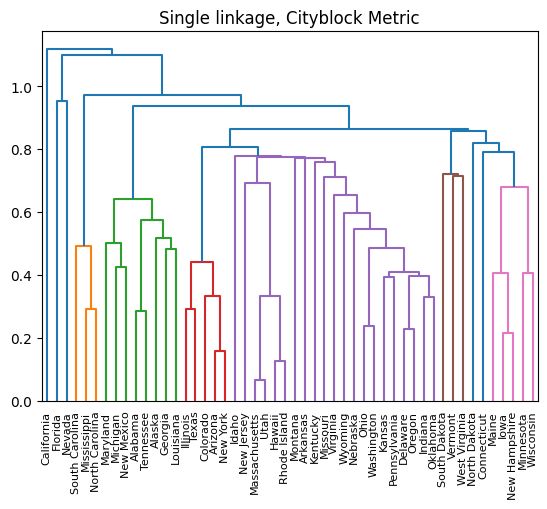

In [96]:
X = usa_pca.values

# Complete Linkage with Euclidean Metric

plt.title("Complete linkage, Euclidean Metric")  
dend = dendrogram(linkage(X, method = 'complete', metric = 'euclidean'), labels = usa_pca.index)  
plt.show()

# Complete Linkage with Cityblock Metric

plt.title("Complete linkage, Cityblock Metric")  
dend = dendrogram(linkage(X, method = 'complete', metric = 'cityblock'), labels = usa_pca.index) 
plt.show()

# Simple Linkage with Euclidean Metric

plt.title("Single linkage, Euclidean Metric")  
dend = dendrogram(linkage(X, method = 'single', metric = 'euclidean'), labels = usa_pca.index) 
plt.show()

# Simple Linkage with Cityblock Metric

plt.title("Single linkage, Cityblock Metric")  
dend = dendrogram(linkage(X, method = 'single', metric = 'cityblock'), labels = usa_pca.index) 
plt.show()

Complete linkage using the Euclidean metric has 2 defined clusters. The clusters seem to align with higher crime (green) and lower crime (orange).
Complete linkage using the Cityblock metric has 3 well defined clusters, but they do not seem to align clearly with the biplot.

### K-means Clustering

Text(0, 0.5, 'Dim 1')

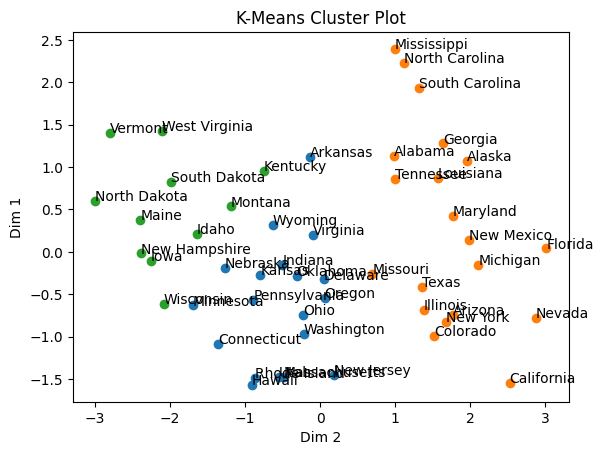

In [97]:
from sklearn.cluster import KMeans

x = X_trans[:,0]
y = X_trans[:,1]

k = 3 # Edit to change value of k
kmeans = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, random_state = 42)
cluster_labels = kmeans.fit_predict(usa_pca)
cent = kmeans.cluster_centers_

# Plot clusters
fig, ax = plt.subplots()

for i in range(0,k):
    ax.scatter(x[cluster_labels == i], y[cluster_labels == i]) 

for i in range(0,len(x)):
        txt = states[i]
        ax.annotate(txt, (x[i], y[i]))

ax.set_title("K-Means Cluster Plot")
ax.set_xlabel("Dim 2")
ax.set_ylabel("Dim 1")

In [109]:
clusters = pd.DataFrame()

plain_df = pd.read_csv('UsArrests.csv', index_col = 'City')

group0_indices = np.argwhere(cluster_labels == 0).transpose()[0] # Returns indices of items in respective groups
group1_indices = np.argwhere(cluster_labels == 1).transpose()[0]
group2_indices = np.argwhere(cluster_labels == 2).transpose()[0]

group0 = np.array(states)[group0_indices] # Returns names of items in respective groups
group1 = np.array(states)[group1_indices]
group2 = np.array(states)[group2_indices]

zero = format([plain_df.loc[x]["UrbanPop"] for x in group0])
one = format([plain_df.loc[x]["UrbanPop"] for x in group1])
two = format([plain_df.loc[x]["UrbanPop"] for x in group2])

the_groups = zero, one, two # List of listscontaining each group
group_num = -1 # Will be used to insert the group number into the final print statement

for i in the_groups:

    tot = 0 # Counter for the total number of values in a group
    i = i.replace(']', '') # Removing non numerals
    i = i.replace('[', '') # Removing non numerals
    i = i.split(',') # i becomes a list

    for j,k in enumerate(i):

        i[j] = float(i[j]) # Converting each item to a float for calculation
        tot += i[j] # Adding all values together
    
    the_mean = round(tot/len(i), 2) # Calculating mean
    group_num += 1

    print(f"Group {group_num}: {i}")
    print(f"\nMean: {the_mean}\n\n")


Group 0: [50.0, 77.0, 72.0, 83.0, 65.0, 66.0, 85.0, 66.0, 62.0, 89.0, 75.0, 68.0, 67.0, 72.0, 87.0, 80.0, 63.0, 73.0, 60.0]

Mean: 71.58


Group 1: [58.0, 48.0, 80.0, 91.0, 78.0, 80.0, 60.0, 83.0, 66.0, 67.0, 74.0, 44.0, 70.0, 81.0, 70.0, 86.0, 45.0, 48.0, 59.0, 80.0]

Mean: 68.4


Group 2: [54.0, 57.0, 52.0, 51.0, 53.0, 56.0, 44.0, 45.0, 32.0, 39.0, 66.0]

Mean: 49.91




The groups do seem to be stratified by how urban the states within are, but there is lots of overlap. Despite Group 0 having the highest average UrbanPop, there are a few states within the group that have a lower UrbanPop than states in Group 2, the group with the lowest average UrbanPop.

If this is so, the differences could be cultural. Earlier, it was seen that assault and rape are somewhat positively correlated with UrbanPop, but murder was not. This may be because in more rural areas where there are stronger communities and everybody knows everybody, rape and assault are going unreported, whereas murder, the crime arguably the hardest to hide if left unreported, occurs at similar rates in rural and urban states.